## Exploratory Data Analysis (EDA) for the GO emotions dataset

In [2]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import json
import numpy as np
from collections import Counter
import string
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.feature_extraction.text import CountVectorizer



reading the data and combining

In [3]:
# Read the three GO emotions datasets
df_train = pd.read_csv('./data/goemotions1.csv')
df_test = pd.read_csv('./data/goemotions2.csv')
df_dev = pd.read_csv('./data/goemotions3.csv')

# Combine the datasets into a single dataframe
df_combined = pd.concat([df_train, df_test, df_dev], ignore_index=True)

# Display the first few rows of the combined dataframe
#print(df_combined.head())
# Display the number of observations and the first few rows of the combined dataframe
print(f"Number of observations: {len(df_combined)}")
print(df_combined.head())

Number of observations: 211225
                                                text       id  \
0                                    That game hurt.  eew5j0j   
1   >sexuality shouldn’t be a grouping category I...  eemcysk   
2     You do right, if you don't care then fuck 'em!  ed2mah1   
3                                 Man I love reddit.  eeibobj   
4  [NAME] was nowhere near them, he was by the Fa...  eda6yn6   

                author            subreddit    link_id   parent_id  \
0                Brdd9                  nrl  t3_ajis4z  t1_eew18eq   
1          TheGreen888     unpopularopinion  t3_ai4q37   t3_ai4q37   
2             Labalool          confessions  t3_abru74  t1_ed2m7g7   
3        MrsRobertshaw             facepalm  t3_ahulml   t3_ahulml   
4  American_Fascist713  starwarsspeculation  t3_ackt2f  t1_eda65q2   

    created_utc  rater_id  example_very_unclear  admiration  ...  love  \
0  1.548381e+09         1                 False           0  ...     0   
1  1.5480

Cleaning

In [4]:
df_combined = df_combined.drop_duplicates()
print(f"Number of observations after removing duplicates: {len(df_combined)}")
# Drop observations where "example_very_unclear" is True these observations have no emotion label and therefore no predictive value
df_combined = df_combined[df_combined['example_very_unclear'] == False]
print(f"Number of observations after removing unclear examples: {len(df_combined)}")
#remove duplicates in the text column
df_combined = df_combined.drop_duplicates(subset=['text'])
print(f"Number of observations after removing duplicates in the text column: {len(df_combined)}")

Number of observations after removing duplicates: 211225
Number of observations after removing unclear examples: 207814
Number of observations after removing duplicates in the text column: 57730


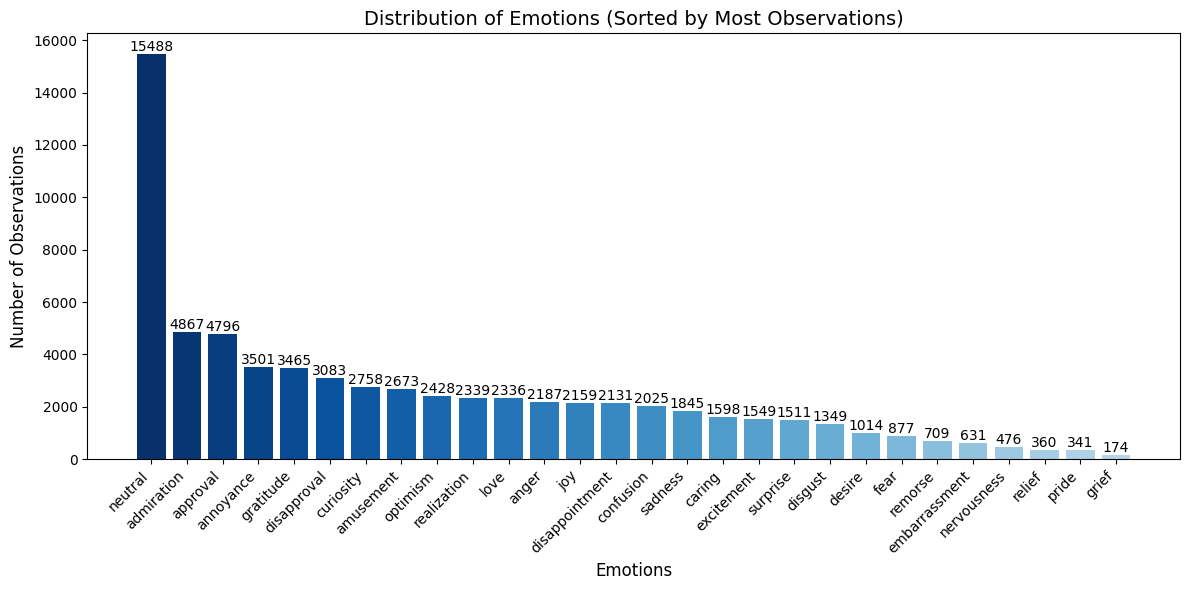

In [ ]:


# Sum the values for each emotion column
emotion_columns = df_combined.columns[9:]  # Select emotion columns
emotion_counts = df_combined[emotion_columns].sum().sort_values(ascending=False)

# Generate a color gradient
colors = cm.Blues(np.linspace(1, 0.3, len(emotion_counts)))

# Plot the distribution
plt.figure(figsize=(12, 6))
bars = plt.bar(emotion_counts.index, emotion_counts.values, color=colors)

# Add exact numbers above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.title('Distribution of Emotions (Sorted by Most Observations)', fontsize=14)
plt.ylabel('Number of Observations', fontsize=12)
plt.xlabel('Emotions', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Mapping the GO emotion labels to the Ekman emotions

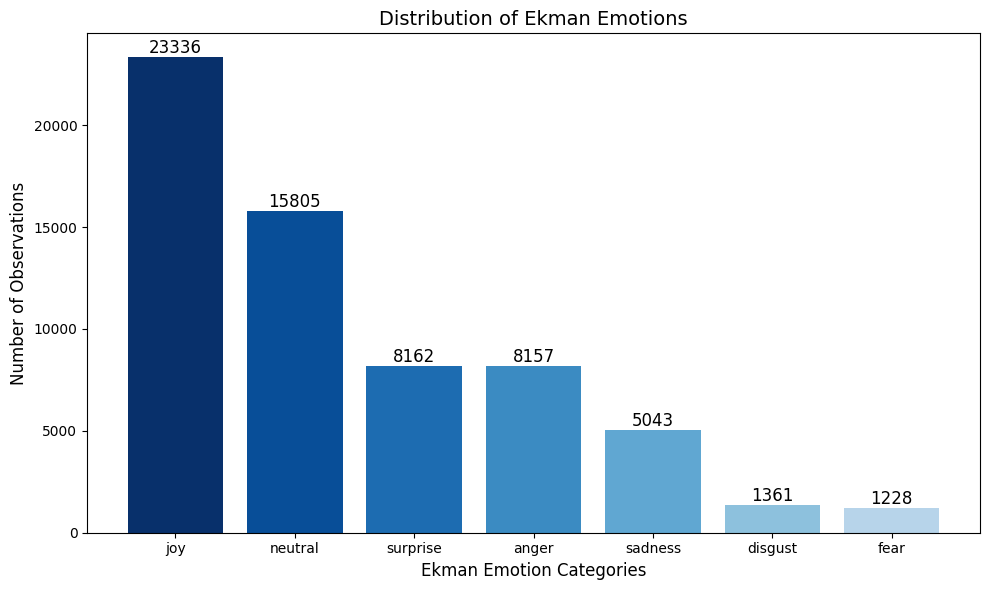

In [38]:
# Define the Ekman mapping as specified in the GO emotions dataset
# Load the Ekman mapping from a JSON file in the data folder
with open('./data/ekman_mapping.json', 'r') as file:
    ekman_mapping = json.load(file)
# Create a new DataFrame with Ekman categories
df_ekman = pd.DataFrame(index=df_combined.index)

# Populate the Ekman categories based on the mapping
for ekman_emotion, go_emotions in ekman_mapping.items():
    # Sum the columns for each GO emotion that maps to this Ekman emotion
    df_ekman[ekman_emotion] = df_combined[go_emotions].sum(axis=1).clip(upper=1)

# Add the 'neutral' category from the original dataset
df_ekman['neutral'] = df_combined['neutral']

# Calculate the total count for each Ekman emotion
ekman_counts = df_ekman.sum().sort_values(ascending=False)

#Create a color gradient for the Ekman emotions
colors_ekman = cm.Blues(np.linspace(1, 0.3, len(ekman_counts)))

# Plot the distribution of Ekman emotions
plt.figure(figsize=(10, 6))
bars = plt.bar(ekman_counts.index, ekman_counts.values, color=colors_ekman)

# Add exact numbers above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', 
             ha='center', va='bottom', fontsize=12)

plt.title('Distribution of Ekman Emotions', fontsize=14)
plt.ylabel('Number of Observations', fontsize=12)
plt.xlabel('Ekman Emotion Categories', fontsize=12)
plt.xticks(rotation=0)  # No need to rotate with fewer categories
plt.tight_layout()
plt.show()

Analysis of the obeservations & standardt deviation

In [39]:
# Calculate text length statistics
df_combined['text_length'] = df_combined['text'].str.len()

# Calculate basic statistics
max_length = df_combined['text_length'].max()
min_length = df_combined['text_length'].min()
mean_length = df_combined['text_length'].mean()
median_length = df_combined['text_length'].median()
std_length = df_combined['text_length'].std()

print(f"Text length statistics:")
print(f"Maximum length: {max_length} characters")
print(f"Minimum length: {min_length} characters")
print(f"Average length: {mean_length:.2f} characters")
print(f"Median length: {median_length} characters")
print(f"Standard deviation: {std_length:.2f} characters")

# Calculate word count statistics
df_combined['word_count'] = df_combined['text'].str.split().str.len()

# Calculate basic statistics for word count
max_words = df_combined['word_count'].max()
min_words = df_combined['word_count'].min()
mean_words = df_combined['word_count'].mean()
median_words = df_combined['word_count'].median()
std_words = df_combined['word_count'].std()

print(f"\nWord count statistics:")
print(f"Maximum words: {max_words}")
print(f"Minimum words: {min_words}")
print(f"Average words: {mean_words:.2f}")
print(f"Median words: {median_words}")
print(f"Standard deviation: {std_words:.2f}")



Text length statistics:
Maximum length: 703 characters
Minimum length: 2 characters
Average length: 69.09 characters
Median length: 66.0 characters
Standard deviation: 36.51 characters

Word count statistics:
Maximum words: 33
Minimum words: 1
Average words: 12.96
Median words: 13.0
Standard deviation: 6.67


Word clouds for the specic Ekman emotions

Generating word clouds for Ekman emotion categories...
Creating word cloud for Ekman emotion: anger (8157 texts)


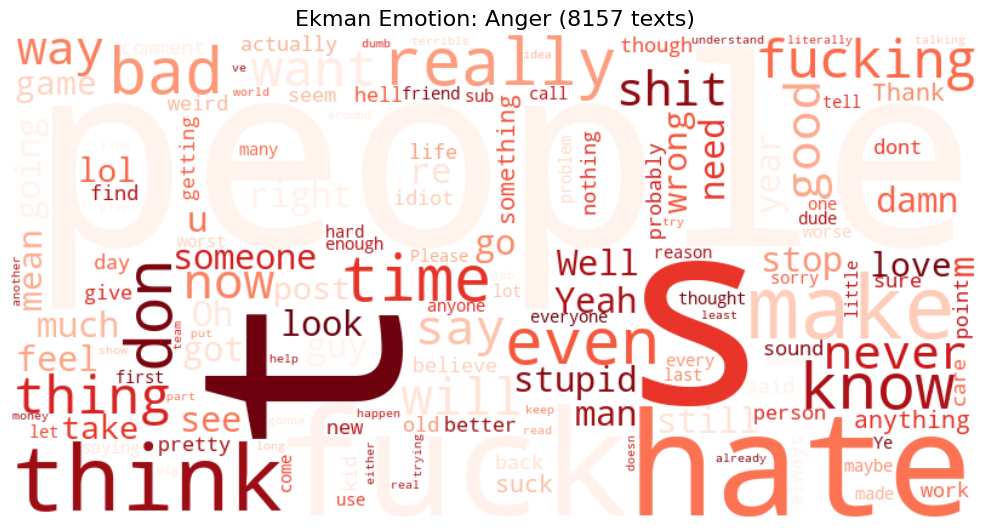

Creating word cloud for Ekman emotion: disgust (1361 texts)


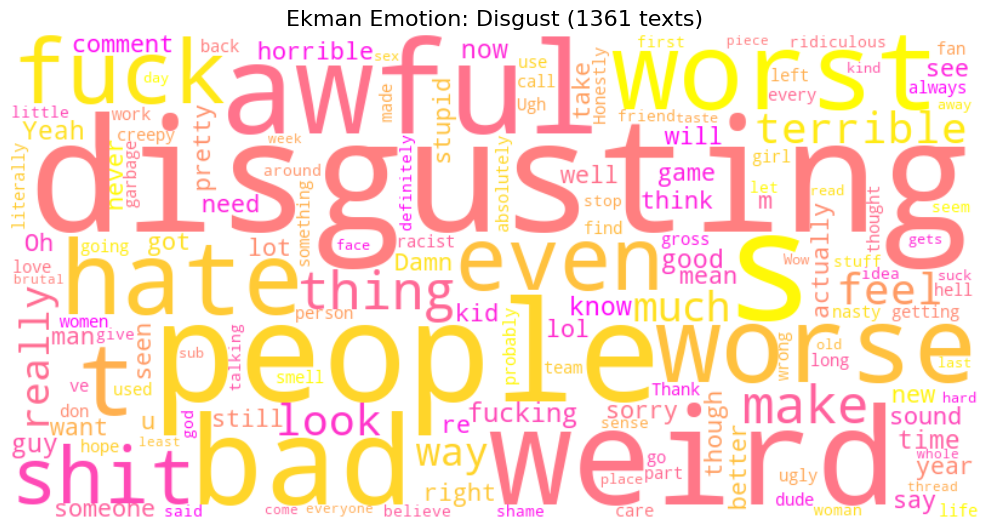

Creating word cloud for Ekman emotion: fear (1228 texts)


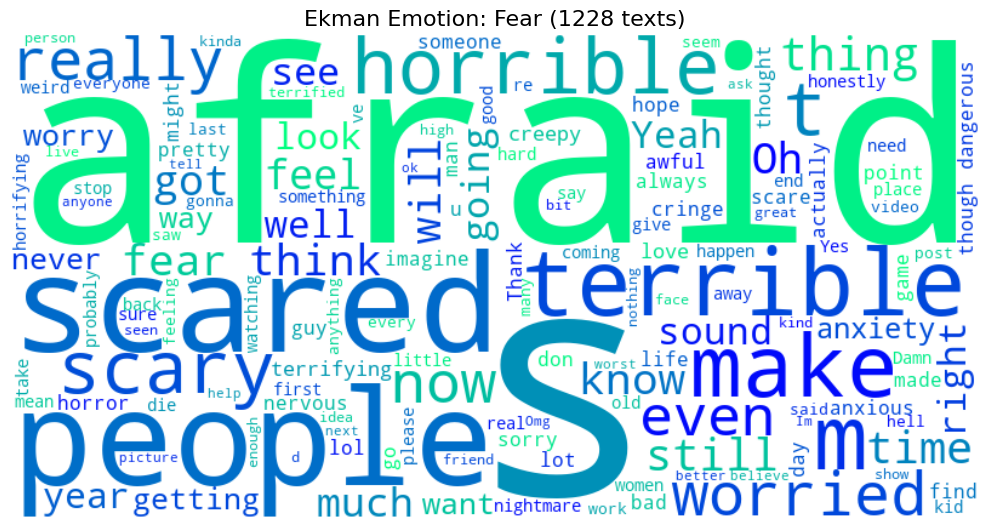

Creating word cloud for Ekman emotion: joy (23336 texts)


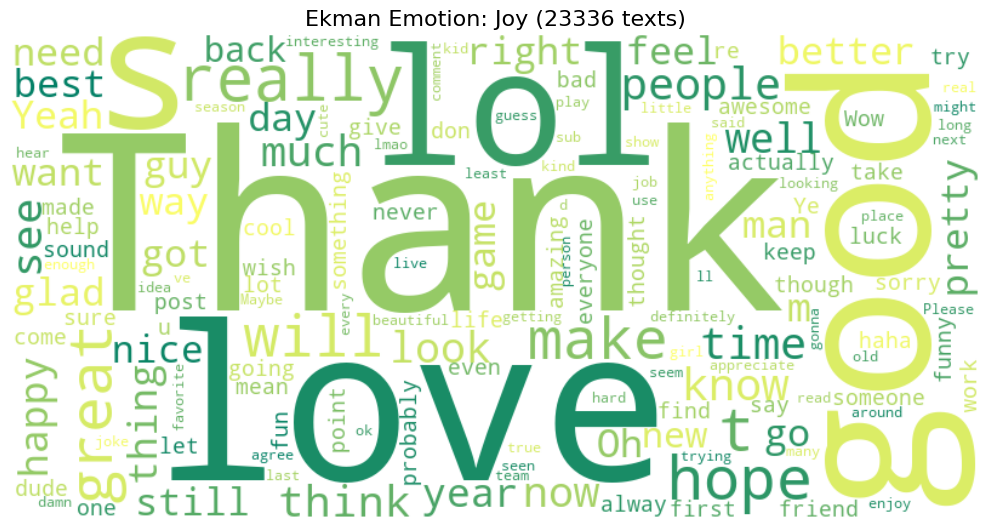

Creating word cloud for Ekman emotion: sadness (5043 texts)


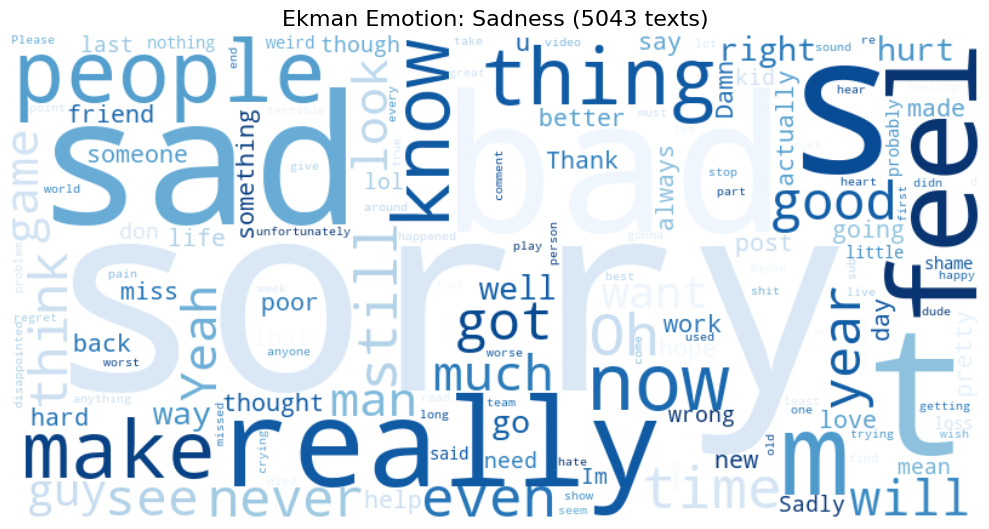

Creating word cloud for Ekman emotion: surprise (8162 texts)


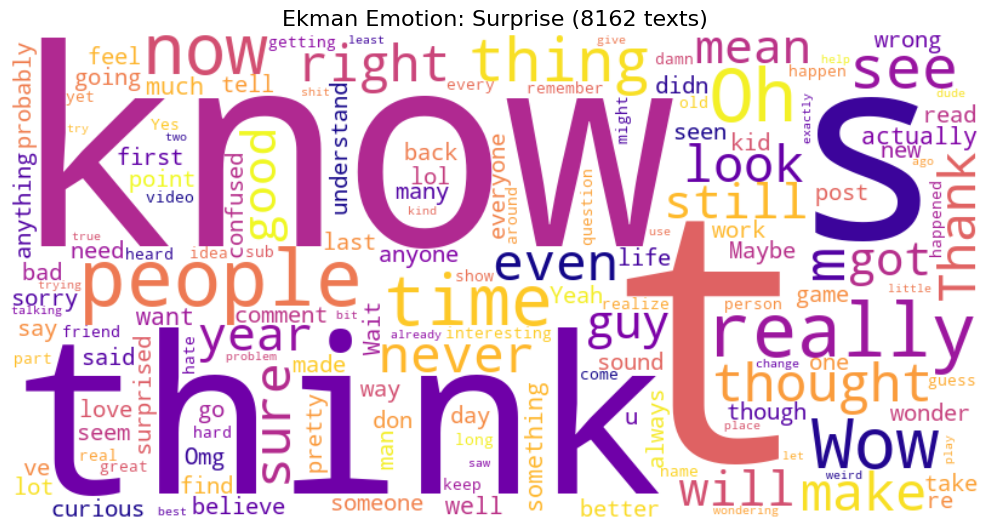

Creating word cloud for Ekman emotion: neutral (15805 texts)


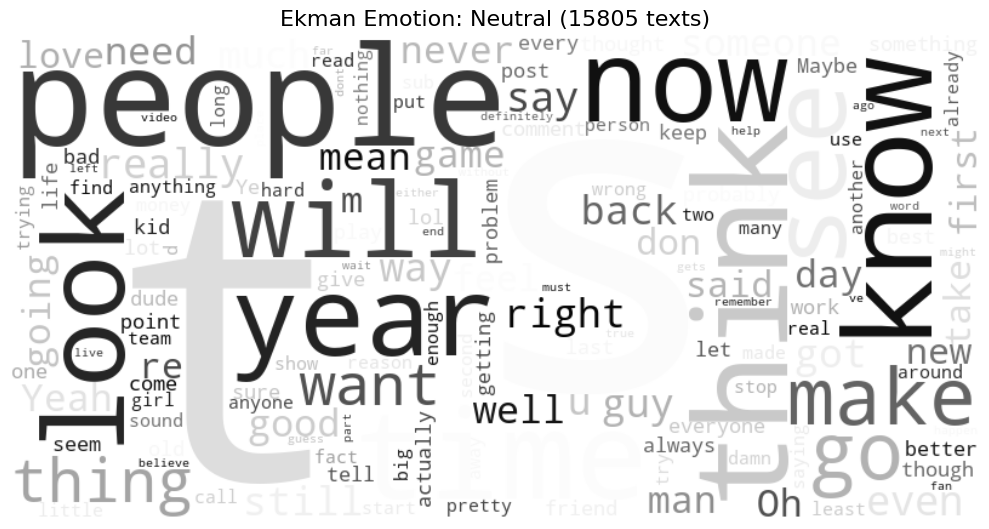

In [43]:
# Define custom color maps for each emotion
custom_color_maps = {
    'joy': 'summer',    
    'anger': 'Reds',    
    'disgust': 'spring',  
    'fear': 'winter',     
    'sadness': 'Blues',  
    'surprise': 'plasma',  
    'neutral': 'Greys'  
}
stop_words = set(STOPWORDS)


# Generate word clouds specifically for Ekman emotion categories
print("Generating word clouds for Ekman emotion categories...")

# Iterate over each emotion to create word clouds
for emotion in ekman_mapping.keys():
    # Filter texts where the specified emotion is present
    filtered_texts = df_ekman.loc[df_ekman[emotion] == 1]
    
    if len(filtered_texts) == 0:
        print(f"No texts found for emotion: {emotion}")
        continue
    
    print(f"Creating word cloud for Ekman emotion: {emotion} ({len(filtered_texts)} texts)")
    
    # Combine all texts for this emotion
    all_text = ' '.join(df_combined.loc[df_ekman[emotion] == 1, 'text'])
    
    # Filter out texts containing special terms
    all_text = ' '.join([text for text in all_text.split() 
                          if 'NAME' not in text 
                          and text.lower() != 'one'
                          and text.lower() != 's'
                          and text.lower() != 'b'])
    
    # Generate word cloud for the current emotion using custom colormap if available, else use 'viridis'
    colormap = custom_color_maps.get(emotion, 'viridis')
    
    # Create and generate a word cloud image with emotion-specific colormap
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          colormap=colormap,
                          stopwords=stop_words,
                          max_words=150,
                          collocations=False,
                          contour_width=3).generate(all_text)
    
    # Display the generated image
    plt.figure(figsize=(10, 6), dpi=100)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Ekman Emotion: {emotion.capitalize()} ({len(filtered_texts)} texts)", fontsize=16)
    plt.tight_layout()
    plt.show()


Further analysis - number of emotions per text

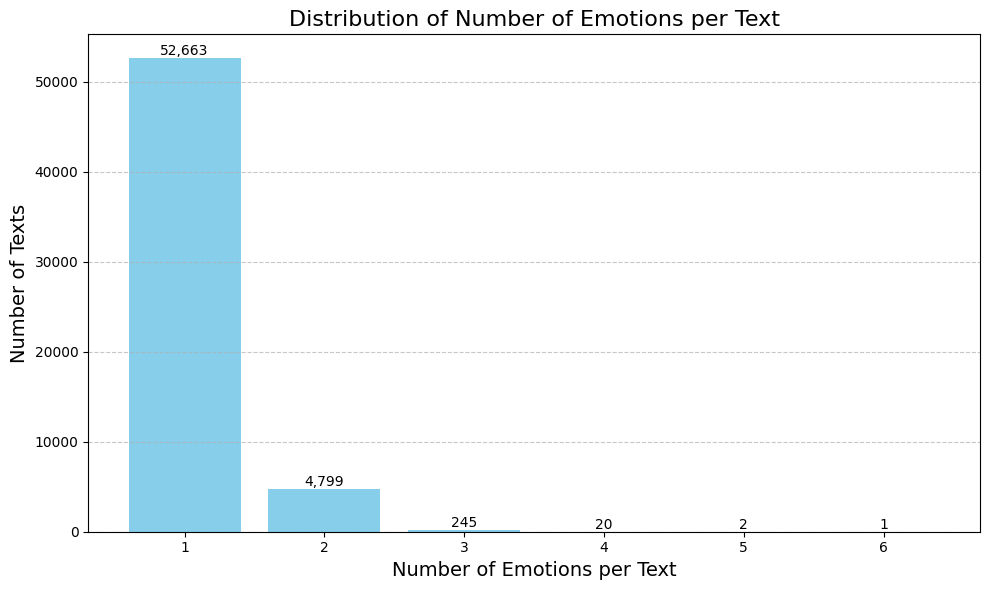

In [ ]:


# Create a list of Ekman emotion columns
emotion_columns = ['joy', 'anger', 'disgust', 'fear', 'sadness', 'surprise', 'neutral']

# Calculate the number of emotion labels per text
df_ekman['num_emotions'] = df_ekman[emotion_columns].sum(axis=1)

# Calculate the frequency of each count of emotion labels
emotion_label_counts = df_ekman['num_emotions'].value_counts().sort_index()

# Creating a bar chart
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
bars = plt.bar(emotion_label_counts.index, emotion_label_counts.values, color='skyblue')
plt.xlabel('Number of Emotions per Text', fontsize=14)
plt.ylabel('Number of Texts', fontsize=14)
plt.title('Distribution of Number of Emotions per Text', fontsize=16)
plt.xticks(emotion_label_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add labels on top of each bar with thousand separator
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}',
             ha='center', va='bottom', fontsize=10)

plt.show()

Top N trigrams for the different emotions

Top 3 trigrams for each Ekman emotion:

Joy:
  happy cake day — 51
  happy new year — 47
  name name name — 41

Anger:
  name name name — 8
  every single time — 4
  name fucking name — 4

Disgust:
  fuck im way — 2
  games win stupid — 2
  name name name — 2

Fear:
  dark full terrors — 2
  im shaking crying — 2
  oh name please — 2

Sadness:
  name name name — 7
  every time name — 4
  feel bad name — 4

Surprise:
  name name name — 20
  20 years ago — 5
  don even know — 5

Neutral:
  name name name — 60
  nike nike nike — 7
  something along lines — 7



C:\Users\Valdemar Schultz\AppData\Local\Temp\ipykernel_10816\4059113896.py:59: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  emotion_colors = plt.cm.get_cmap('tab10', num_emotions_to_plot)


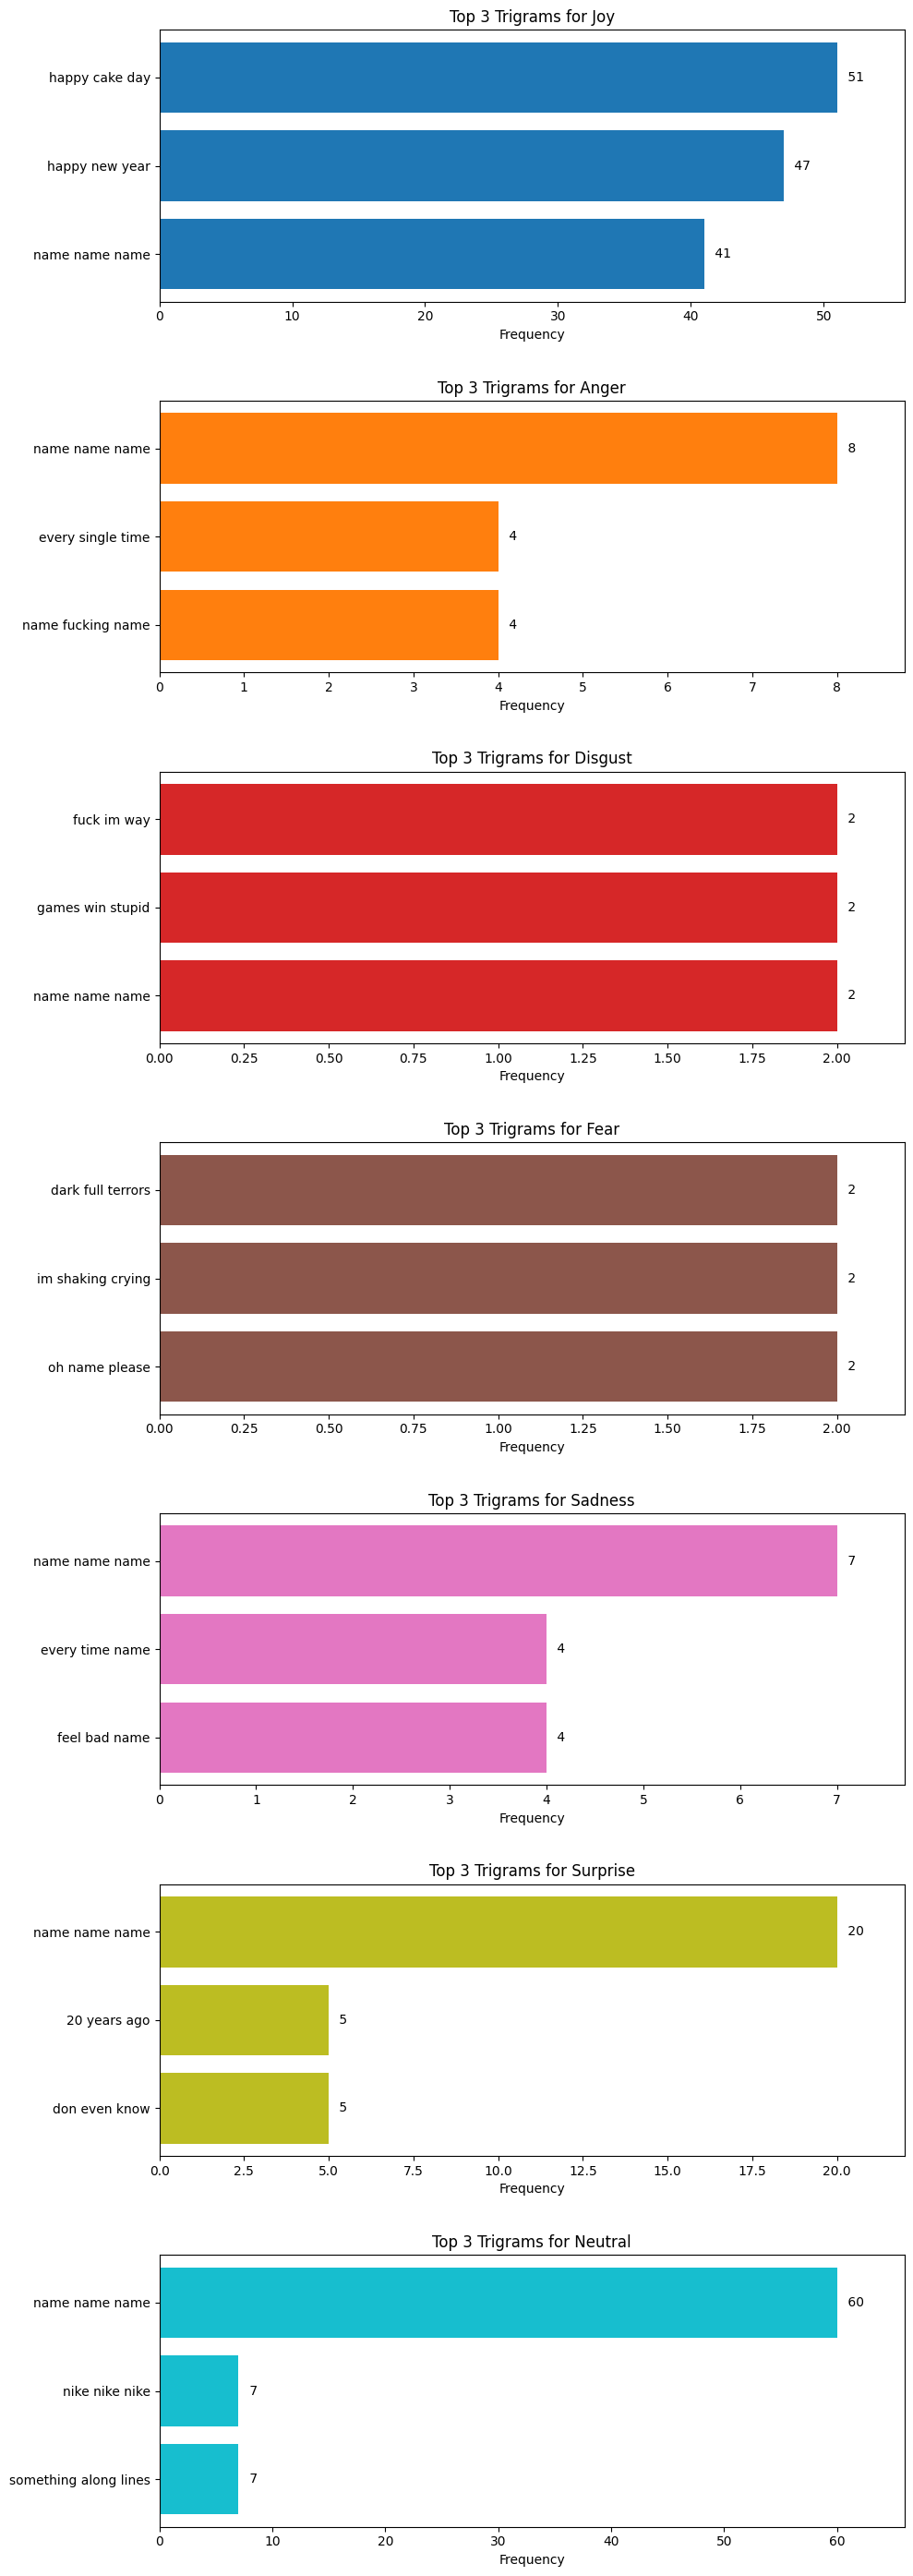

In [55]:

# Function to extract top N trigrams from a pandas Series of texts
def get_top_trigrams(texts, stop_words, top_n=3):
    # convert stop_words set to list for CountVectorizer
    # Use the predefined stop_words set from cell 11
    sw = list(stop_words)
    vect = CountVectorizer(
        ngram_range=(3,3),
        stop_words=sw,
       token_pattern=r"(?u)\b\w[\w']+\b" # Ensure words like "don't" are treated correctly if needed, or adjust pattern
    )
    try:
        X = vect.fit_transform(texts)
        freqs = X.sum(axis=0).A1
        vocab = vect.get_feature_names_out()
        # pair up and sort
        trigram_freq = sorted(zip(vocab, freqs), key=lambda x: x[1], reverse=True)
        return trigram_freq[:top_n]
    except ValueError:
        # Handle case where vocabulary is empty after stop word removal
        return []

# --- Print Top Trigrams ---
print("Top 3 trigrams for each Ekman emotion:\n")
top_trigrams_by_emotion = {} # Initialize dictionary to store trigrams for plotting
for emotion in ['joy', 'anger', 'disgust', 'fear', 'sadness', 'surprise', 'neutral']:
    # select texts labeled with this emotion
    texts = df_combined.loc[df_ekman[emotion] == 1, 'text']
    if texts.empty:
        print(f"{emotion.capitalize()}: no texts found\n")
        top_trigrams_by_emotion[emotion] = [] # Store empty list if no texts
        continue

    top_tris = get_top_trigrams(texts, stop_words, top_n=3)
    top_trigrams_by_emotion[emotion] = top_tris # Store results for plotting

    print(f"{emotion.capitalize()}:")
    if top_tris:
        for trigram, freq in top_tris:
            print(f"  {trigram} — {freq}")
    else:
        print("  No trigrams found (possibly due to stop words or short texts).")
    print()

# --- Visualize Top Trigrams ---

# Filter out emotions with no trigrams before plotting
plot_data = {emo: tris for emo, tris in top_trigrams_by_emotion.items() if tris}
num_emotions_to_plot = len(plot_data)

if num_emotions_to_plot > 0:
    fig, axes = plt.subplots(nrows=num_emotions_to_plot, ncols=1, figsize=(10, 4 * num_emotions_to_plot), sharex=False)

    # Ensure axes is always iterable, even if only one subplot
    if num_emotions_to_plot == 1:
        axes = [axes]

    # Define colors (can reuse from previous cells or define new ones)
    # Using a colormap like 'tab10' provides distinct colors
    emotion_colors = plt.cm.get_cmap('tab10', num_emotions_to_plot)

    i = 0
    for emotion, trigrams in plot_data.items():
        ax = axes[i]
        labels, values = zip(*trigrams)
        y_pos = np.arange(len(labels))

        # Use a color from the colormap
        ax.barh(y_pos, values, align='center', color=emotion_colors(i))
        ax.set_yticks(y_pos)
        ax.set_yticklabels(labels)
        ax.invert_yaxis()  # labels read top-down
        ax.set_xlabel('Frequency')
        ax.set_title(f'Top 3 Trigrams for {emotion.capitalize()}') # Corrected title

        # Add frequency labels to the bars
        for index, value in enumerate(values):
            # Adjust text position slightly for better visibility
            ax.text(value + (max(values) * 0.01), index, f' {value}', va='center')

        # Set x-axis limits to provide some padding
        ax.set_xlim(right=max(values) * 1.1)

        i += 1 # Increment subplot index

    plt.tight_layout(h_pad=3.0) # Adjust vertical padding between subplots
    plt.show()
else:
    print("No trigrams found for any emotion to plot.")
